# <span style="color:red">  Exploratory Data Analysis on Crime Data from Los Angeles </span>
    
   

#### <span style="color:brown"> Authors : Sanjaya deshapriya gunawardena , Sivaprasad Puthumadthil rameshan nair </span>
#### <span style="color:brown"> Subject : Intermediate Python for Data Science </span>    

## Aim:

Perform Exploratory data analysis on data set "crime data from Los Angeles" 

This invloves

    1. Understanding the Data
    2. Data Cleaning
    3. Data Inspection
    4. Data Visualization
    5. Exploratory Questions

## Data Set:

<br>
    
This dataset reflects the crime incidents recorded in the City of Los Angeles starting from the year 2020 to the present.

The dataset spans from 2020 to the present, offering a comprehensive look at crime trends over a significant period.

Data is transcribed from original crime reports that are initially documented on paper, which suggests a manual process of data entry into the digital database.

Since it is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data

source : https://catalog.data.gov/dataset/crime-data-from-2020-to-present
<br>


        Resource Type	           Dataset
        Metadata Created Date	   November 10, 2020
        Metadata Updated Date	   February 24, 2024
        Publisher	                   data.lacity.org
        Maintainer	                   LAPD OpenData

## The need of doing EDA:

<br>

EDA serves as a critical process in data analysis and modeling for several key reasons, which includes :

- Understanding the Dataset
- Identify Patterns and Relationships
- Detecting Anomalies
- Data Cleaning and Preparation

<h1 style="color:blue">1.Understanding the Data: </h1>

First let's load the data set and necessary libraries

In [1]:
#Import the numpy and pandas package

import numpy as np
import pandas as pd

#import libraries for Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

# for imputing missing values
from sklearn.impute import SimpleImputer

In [2]:
crime_data = pd.read_csv(r"C:\Users\puthu\siva\EPITA\S2\Intermediate_Python_for_Data_science\Final_Project\dataset\Crime_Data_from_2020_to_Present.csv")

Now let's try to understand more about the data

In [3]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
crime_data.shape

(892934, 28)

In [5]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

<h1 style="color:blue">2.Data Cleaning </h1>

<h2 style="color:black">Handle Missing Values - DROP</h1>
 <br>

In [6]:
crime_data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           124329
Vict Age               0
Vict Sex          118301
Vict Descent      118309
Premis Cd             10
Premis Desc          548
Weapon Used Cd    583395
Weapon Desc       583395
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          827855
Crm Cd 3          890734
Crm Cd 4          892871
LOCATION               0
Cross Street      751954
LAT                    0
LON                    0
dtype: int64

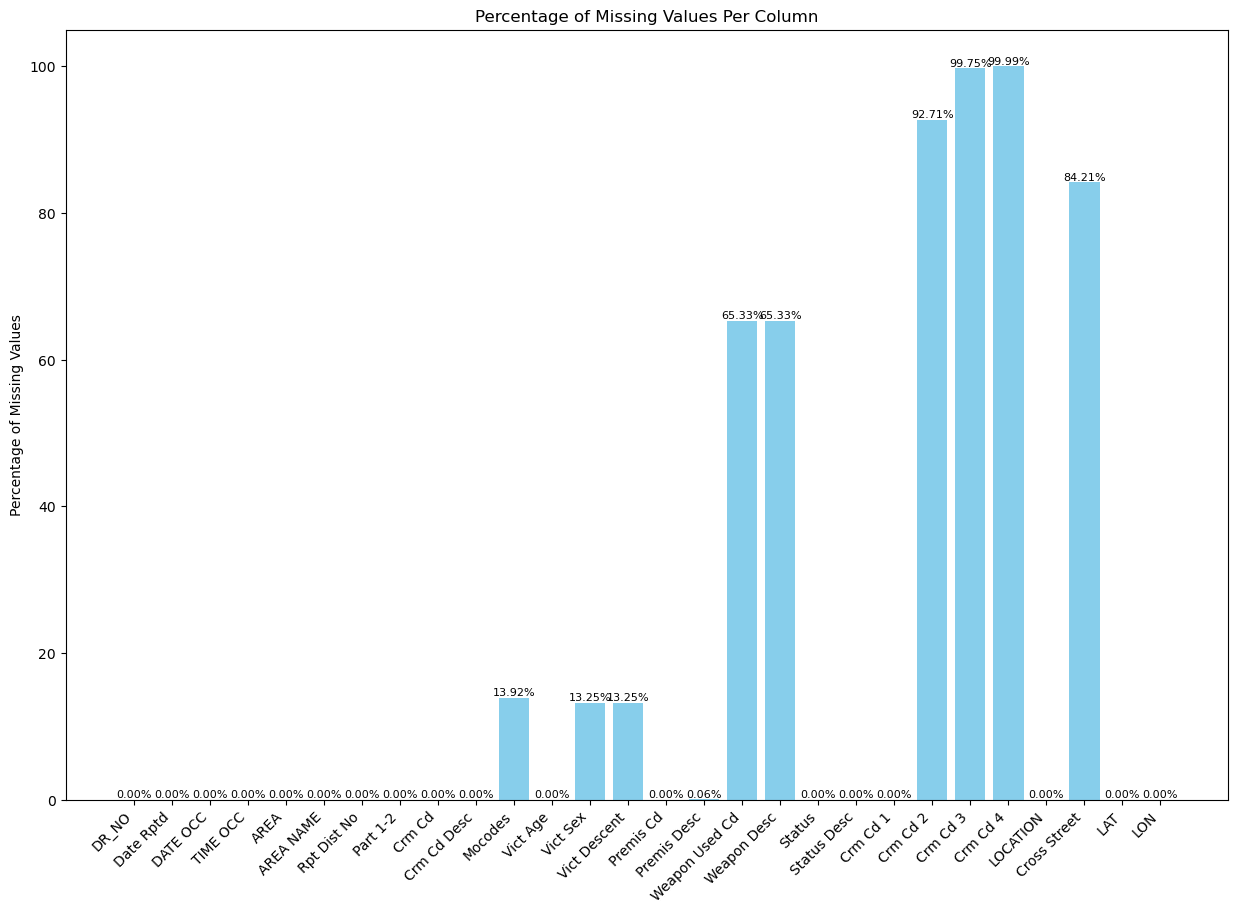

In [7]:
missing_data = crime_data.isnull().mean() * 100

plt.figure(figsize=(15, 10))  
bars = plt.bar(missing_data.index, missing_data.values, color='skyblue') 

plt.title('Percentage of Missing Values Per Column')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.2f}%", va='bottom', ha='center', fontsize=8)

plt.show()

In [8]:
print(missing_data)

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           13.923649
Vict Age           0.000000
Vict Sex          13.248572
Vict Descent      13.249467
Premis Cd          0.001120
Premis Desc        0.061371
Weapon Used Cd    65.334616
Weapon Desc       65.334616
Status             0.000000
Status Desc        0.000000
Crm Cd 1           0.001232
Crm Cd 2          92.711779
Crm Cd 3          99.753621
Crm Cd 4          99.992945
LOCATION           0.000000
Cross Street      84.211599
LAT                0.000000
LON                0.000000
dtype: float64


Columns with extremely high percentages of missing values may not provide enough information for analysis or predictive modeling. 

in this data set,

    
        Crm Cd 2 (92.71% missing)
        Crm Cd 3 (99.75% missing)
        Crm Cd 4 (99.99% missing)
        Weapon Used Cd and Weapon Desc (both 65.33% missing)
        Cross Street (84.21% missing)
    

These columns have such a significant amount of data missing that imputing values or cleaning might not be justifiable or might introduce bias.

so let's drop these coloumns.

In [9]:
# let's drop DR_NO also as it is an identifier and it wont serve any value
columns_to_drop = ['DR_NO','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Weapon Used Cd', 'Weapon Desc', 'Cross Street']

# Drop the columns if they exist in the DataFrame
crime_data = crime_data.drop(columns=[col for col in columns_to_drop if col in crime_data.columns], axis=1)

# Verify the columns are dropped
print(crime_data.columns)

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')


In [10]:
missing_data = crime_data.isnull().mean() * 100
print(missing_data)

Date Rptd        0.000000
DATE OCC         0.000000
TIME OCC         0.000000
AREA             0.000000
AREA NAME        0.000000
Rpt Dist No      0.000000
Part 1-2         0.000000
Crm Cd           0.000000
Crm Cd Desc      0.000000
Mocodes         13.923649
Vict Age         0.000000
Vict Sex        13.248572
Vict Descent    13.249467
Premis Cd        0.001120
Premis Desc      0.061371
Status           0.000000
Status Desc      0.000000
Crm Cd 1         0.001232
LOCATION         0.000000
LAT              0.000000
LON              0.000000
dtype: float64


<h2 style="color:black">Handle Missing Values - Impute</h1>
 <br>

To impute the remaining columns with missing values we'll address them based on their type (categorical or numerical) and the percentage of missing data.

In [11]:
print(crime_data.dtypes)

Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
AREA NAME        object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc      object
Mocodes          object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Premis Desc      object
Status           object
Status Desc      object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object


Perform Imputation on Categorical data

In [12]:
# Categorical imputer for 'most frequent' strategy
cat_imputer = SimpleImputer(strategy='most_frequent')

# Columns to impute with the most frequent value
cat_cols = ['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc']

crime_data[cat_cols] = cat_imputer.fit_transform(crime_data[cat_cols])

Perform Imputation on numerical data

In [13]:
crime_data['Premis Cd'] = crime_data['Premis Cd'].fillna(crime_data['Premis Cd'].mode()[0])
crime_data['Crm Cd 1'] = crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd 1'].mode()[0])

In [14]:
# Verify imputation
print(crime_data.isnull().mean() * 100)

Date Rptd       0.0
DATE OCC        0.0
TIME OCC        0.0
AREA            0.0
AREA NAME       0.0
Rpt Dist No     0.0
Part 1-2        0.0
Crm Cd          0.0
Crm Cd Desc     0.0
Mocodes         0.0
Vict Age        0.0
Vict Sex        0.0
Vict Descent    0.0
Premis Cd       0.0
Premis Desc     0.0
Status          0.0
Status Desc     0.0
Crm Cd 1        0.0
LOCATION        0.0
LAT             0.0
LON             0.0
dtype: float64


<h2 style="color:black">Correct Data Types</h1>
 <br>

Correcting data types is an essential step in data cleaning to ensure that each column in the dataset is of the appropriate type for analysis or modeling. Data types influence how data is represented and how operations can be performed on the data. 

In [15]:
print(crime_data.dtypes)

Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
AREA NAME        object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc      object
Mocodes          object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Premis Desc      object
Status           object
Status Desc      object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object


Categorical Columns (AREA NAME, Vict Sex, Vict Descent, Status, and potentially others like Crm Cd Desc, Mocodes, Premis Desc, Status Desc, LOCATION): If these columns have a limited set of repeating values, converting them to category can save memory and may facilitate certain types of analysis.

In [16]:
unique_values = crime_data['AREA NAME'].unique()
print(unique_values)
unique_values2 = crime_data['Vict Sex'].unique()
print(unique_values2)
unique_values3 = crime_data['Status Desc'].unique()
print(unique_values3)

['Wilshire' 'Central' 'Southwest' 'Van Nuys' 'Hollywood' 'Southeast'
 'Newton' 'Mission' 'Rampart' 'Hollenbeck' 'West Valley' 'West LA'
 'Olympic' 'Topanga' 'Northeast' '77th Street' 'Pacific' 'N Hollywood'
 'Harbor' 'Foothill' 'Devonshire']
['M' 'X' 'F' 'H' '-']
['Adult Arrest' 'Invest Cont' 'Juv Arrest' 'Adult Other' 'Juv Other' 'UNK']


In [17]:
crime_data['AREA NAME'] = crime_data['AREA NAME'].astype('category')
crime_data['Vict Sex'] = crime_data['Vict Sex'].astype('category')
crime_data['Status Desc'] = crime_data['Status Desc'].astype('category')

Date Columns (Date Rptd and DATE OCC): These are currently object types, which usually means they are stored as strings. For date-related operations (such as filtering by date, calculating durations, or resampling data), it's more efficient to have these in datetime64 format.

In [18]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

In [19]:
print(crime_data.dtypes)

Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME             category
Rpt Dist No              int64
Part 1-2                 int64
Crm Cd                   int64
Crm Cd Desc             object
Mocodes                 object
Vict Age                 int64
Vict Sex              category
Vict Descent            object
Premis Cd              float64
Premis Desc             object
Status                  object
Status Desc           category
Crm Cd 1               float64
LOCATION                object
LAT                    float64
LON                    float64
dtype: object


<h2 style="color:black">Remove Duplicates</h1>
 <br>

In [20]:
duplicates = crime_data.duplicated()
print(duplicates.any())

True


since it is False there are no duplicate coloumns

In [34]:
duplicate_rows = crime_data[crime_data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 2439


Remove Duplicates: You can remove these duplicates while keeping the first occurrence of each duplicated row.

In [36]:
crime_data_cleaned = crime_data.drop_duplicates()

Verify Removal: After removing the duplicates, you should check to ensure they have been removed.

In [37]:
print("Duplicates remaining:", crime_data_cleaned.duplicated().any())

Duplicates remaining: False


In [38]:
crime_data_cleaned.reset_index(drop=True, inplace=True)

In [41]:
print(crime_data_cleaned.shape)
print(crime_data.shape)

(890495, 24)
(892934, 24)


In [42]:
crime_data = crime_data_cleaned

In [43]:
print(crime_data.shape)

(890495, 24)


<h1 style="color:blue">3.Data Inspection </h1>

summary of statistics including mean, median (50% percentile), standard deviation, minimum, and maximum values

In [44]:
# Summary statistics for numerical columns
numerical_summary = crime_data.describe()
print(numerical_summary)

            TIME OCC           AREA    Rpt Dist No       Part 1-2  \
count  890495.000000  890495.000000  890495.000000  890495.000000   
mean     1336.688933      10.700140    1116.445173       1.411553   
std       653.008274       6.102471     610.244357       0.492115   
min         1.000000       1.000000     101.000000       1.000000   
25%       900.000000       6.000000     615.000000       1.000000   
50%      1415.000000      11.000000    1141.000000       1.000000   
75%      1900.000000      16.000000    1615.000000       2.000000   
max      2359.000000      21.000000    2199.000000       2.000000   

              Crm Cd       Vict Age      Premis Cd       Crm Cd 1  \
count  890495.000000  890495.000000  890495.000000  890495.000000   
mean      500.762648      29.705563     306.554224     500.504606   
std       207.679918      21.819191     217.213741     207.468923   
min       110.000000      -3.000000     101.000000     110.000000   
25%       331.000000       2.0000

<h1 style="color:blue">4.Data Visualization </h1>

Data visualization is a powerful step in exploratory data analysis. It allows you to understand the distribution and frequency of your data visually and help to understand more about the data

### Distribution of Crimes by Time

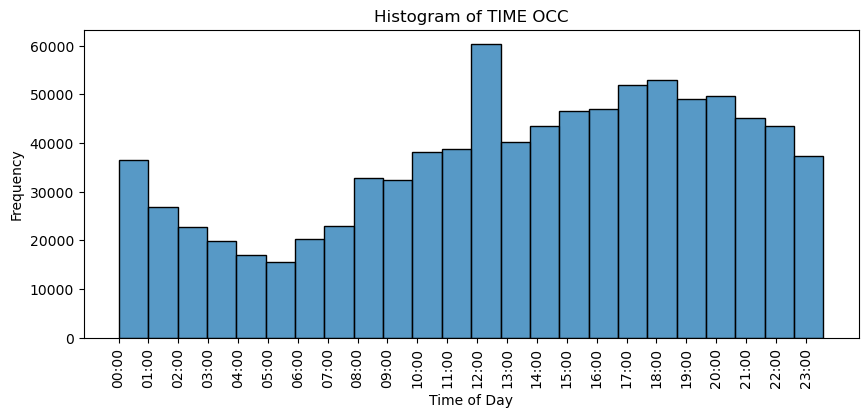

In [45]:
plt.figure(figsize=(10, 4))
# Assuming 'TIME OCC' is in a 24-hour format where 1200 represents 12:00 PM
sns.histplot(crime_data['TIME OCC'], bins=24, kde=False)  # 24 bins for 24 hours
plt.title('Histogram of TIME OCC')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
# Set x-ticks to hourly labels with vertical rotation
plt.xticks(ticks=range(0, 2400, 100), labels=[f'{hour:02d}:00' for hour in range(24)], rotation=90)
plt.show()


#### Findings from the histogram

TIME OCC

        -  The histogram has multiple peaks, suggesting that certain times of day have more incidents than others. This could reflect real-world patterns like increased crime during specific hours.
        -  The highest peaks might correspond to specific times when crime rates are highest. 

### Distribution of crimes by Area

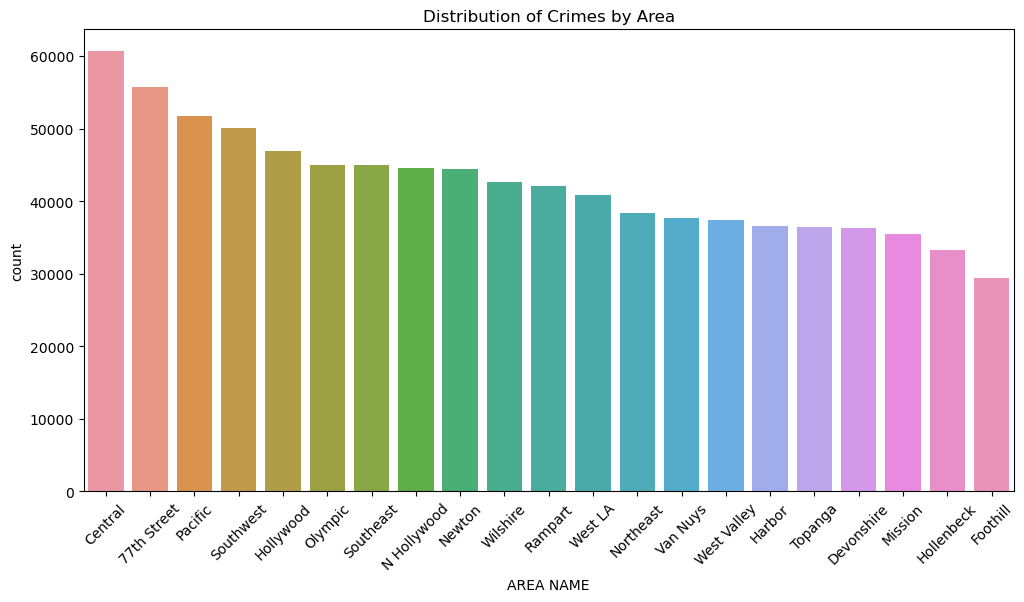

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AREA NAME', data=crime_data, order=crime_data['AREA NAME'].value_counts().index)
plt.title('Distribution of Crimes by Area')
plt.xticks(rotation=45)
plt.show()

### Findings from the histogram

    High Crime Areas: The area labeled "Central" has the highest count of crimes, followed by "77th Street" and "Pacific". These areas might be crime hotspots or simply more populated, leading to a higher number of reported incidents.
    
    Policy Implications: For policymakers and law enforcement, such a distribution could inform resource allocation, community engagement strategies, and targeted interventions in higher crime areas.

### Distribution  of victim ages in reported crimes

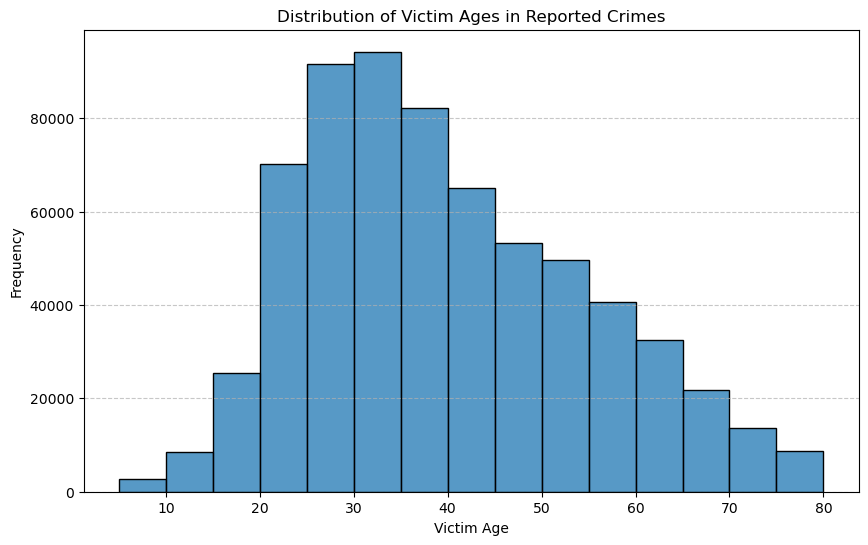

In [61]:
# Plotting the distribution of victim ages
plt.figure(figsize=(10, 6))
sns.histplot(crime_data['Vict Age'], bins=range(5 ,81, 5), kde=False)
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

    Most Common Age Group: The distribution is skewed to the right, with a higher frequency of reported crimes involving younger victims. The most common age group for victims seems to be in their late teens to mid-30s, as indicated by the tallest bars in the histogram.
    
    Low Frequency in Elderly: There is a notably lower frequency of reported crimes involving elderly victims (ages 60 and above).
  

### Distribution  of Top 50 crime types

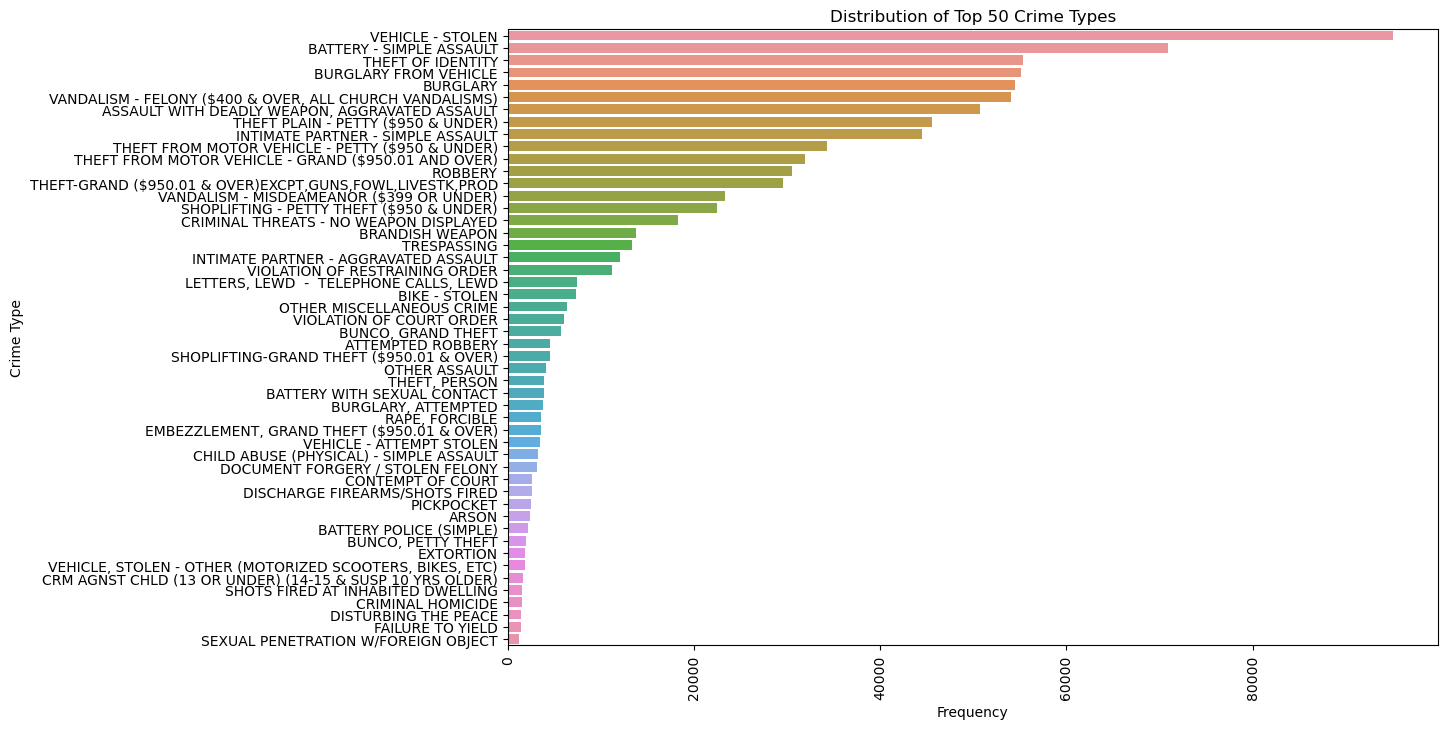

In [48]:
plt.figure(figsize=(12, 8))
# Select the top 50 most common crime descriptions and sort them in descending order
top_crime_types = crime_data['Crm Cd Desc'].value_counts().head(50).index

# Create the bar plot
sns.countplot(y='Crm Cd Desc', 
              data=crime_data[crime_data['Crm Cd Desc'].isin(top_crime_types)],
              order=top_crime_types)
plt.title('Distribution of Top 50 Crime Types')
plt.xticks(rotation=90) 
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()


### Distribution of  crimes against victims by ethnicity

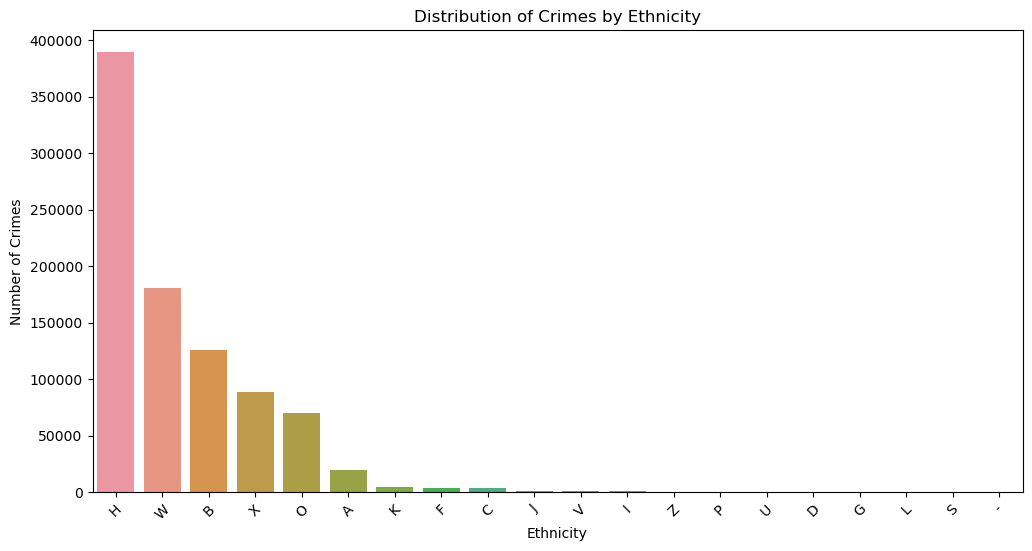

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Vict Descent', data=crime_data, order=crime_data['Vict Descent'].value_counts().index)
plt.title('Distribution of Crimes by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

### Distribution of  crimes involving victims under 18 by area

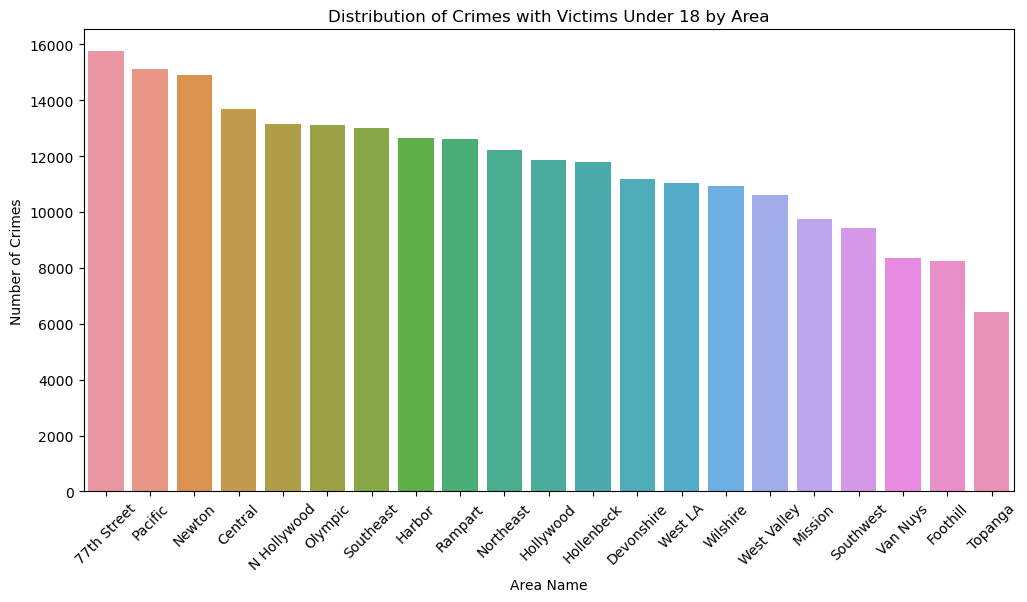

In [50]:
under_18_data = crime_data[crime_data['Vict Age'] < 18]

# Create a countplot for the distribution of crimes involving victims under 18 by area
plt.figure(figsize=(12, 6))
sns.countplot(x='AREA NAME', data=under_18_data, order=under_18_data['AREA NAME'].value_counts().index)
plt.title('Distribution of Crimes with Victims Under 18 by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:blue">5.Exploratory Questions </h1>

### How the number of reported crimes change over time?

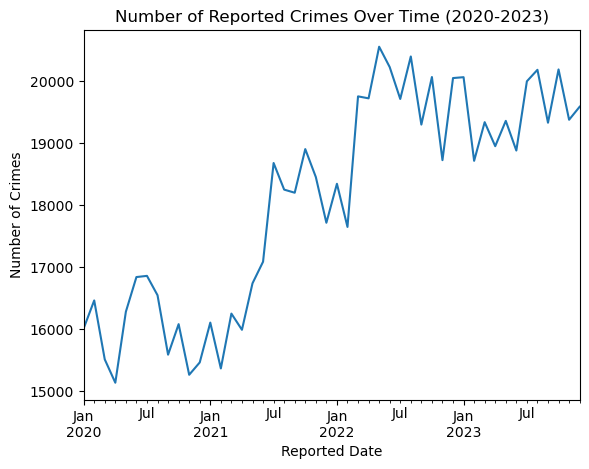

In [51]:
filtered_data = crime_data[(crime_data['Date Rptd'] >= '2020-01-01') & 
                           (crime_data['Date Rptd'] < '2024-01-01')].copy()

# Convert date columns to datetime format
filtered_data['Date Rptd'] = pd.to_datetime(filtered_data['Date Rptd'])
filtered_data['DATE OCC'] = pd.to_datetime(filtered_data['DATE OCC'])

# Create a line plot for the number of reported crimes over time
filtered_data.resample('M', on='Date Rptd').size().plot(title='Number of Reported Crimes Over Time (2020-2023)')
plt.xlabel('Reported Date')
plt.ylabel('Number of Crimes')
plt.show()

    Initial Decrease: There's a noticeable decrease in the number of crimes reported at the beginning of 2020, which could correspond to the onset of the COVID-19 pandemic and associated lockdowns.

    Subsequent Increase: After the initial decrease, there is a significant increase in crime reports that peaks around mid-2020.

    Fluctuations: Throughout the period from mid-2020 to 2023, the number of crimes reported fluctuates over time with several peaks and troughs.

    Despite fluctuations, there seems to be a general upward trend in the number of reported crimes

    Seasonal Patterns: There may be seasonal patterns, as suggested by the cyclical nature of the peaks and troughs.for example , Mid-Year Peaks: It appears that mid-year months, likely summer months, tend to have higher numbers of reported crimes.   This is a common trend in many regions where crime rates increase during warmer month



### Which areas have a higher frequency of crimes for a particular gender ?

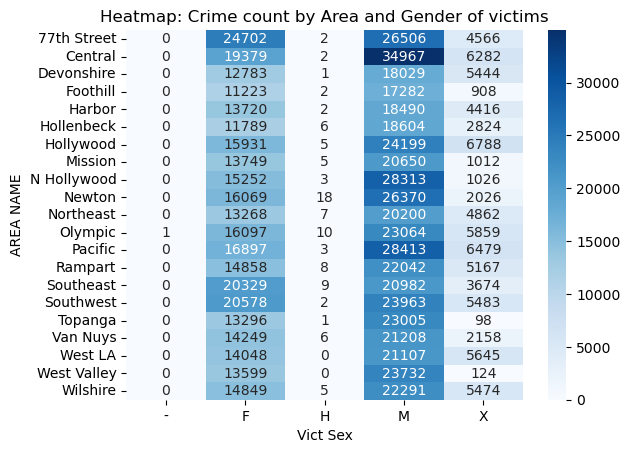

In [52]:
contingency_table = pd.crosstab(crime_data['AREA NAME'], crime_data['Vict Sex'])
sns.heatmap(contingency_table, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap: Crime count by Area and Gender of victims')
plt.show()

    Some areas exhibit particularly high crime rates for the 'M' category, such as '77th Street', 'Central', and 'Southwest',which have the darkest shades, indicating the highest crime counts.

    Low Female Crime Rates: The crime rates for the 'F' gender category are lower across all areas, with much lighter shades on the heatmap

    The 'X' category, which might represent a non-binary or unspecified gender, shows very minimal or no crime counts across all areas.

### Which race is vulnurable in which  parts ?

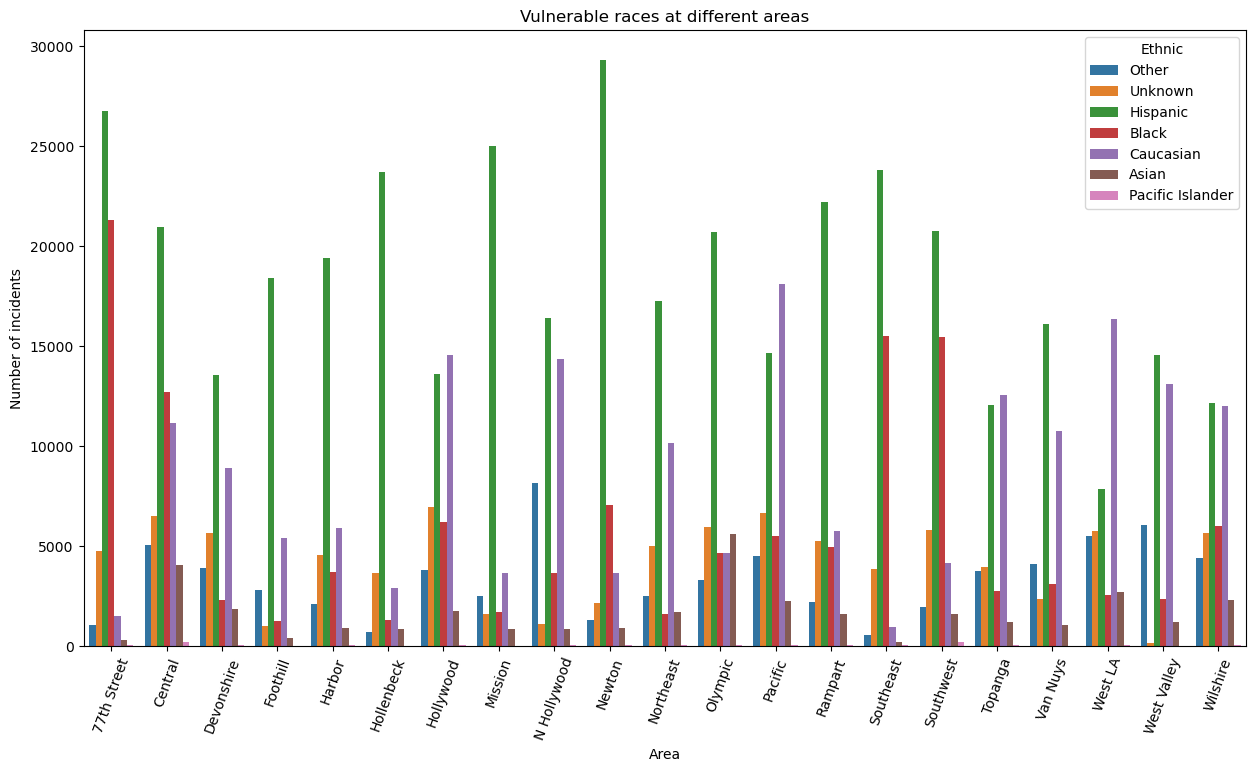

In [53]:
crime_data['Ethnic'] = crime_data['Vict Descent'].transform(lambda x: 
                                "Hispanic" if x=="H" 
                                else "Caucasian" if x=="W" 
                                else "Black" if x == "B" 
                                else "Unknown" if x=="X" 
                                else "Other" if x=="O" 
                                else "Pacific Islander" if x in ["G", "I", "P", "S", "U"] 
                                else "Asian")


plt.figure(figsize=(15,8))
sns.countplot(data = crime_data, x = "AREA NAME", hue = "Ethnic")
plt.xticks(rotation=70)
plt.title("Vulnerable races at different areas")
plt.ylabel("Number of incidents")
plt.xlabel("Area");

From the plot, we may jump to conclusion that Hispanic people are being targeted the most in almost every area, followed by Caucasian, then Asians, then Black people.

Hispanic people should be extra careful in Newton and 77th street.



### In the end of 2023 how many crimes were still under investigation in LAPD ?

In [54]:
# Filter data for the end of 2023 and with Status Desc == Invest Cont
investigation_end_2023 = crime_data[(crime_data['Date Rptd'].dt.year == 2023) & (crime_data['Status Desc'] == 'Invest Cont')]

# Count the number of crimes
investigation_count = investigation_end_2023.shape[0]

print(f"The number of crimes still under investigation of LAPD at the end of 2023: {investigation_count}")


The number of crimes still under investigation of LAPD at the end of 2023: 195589


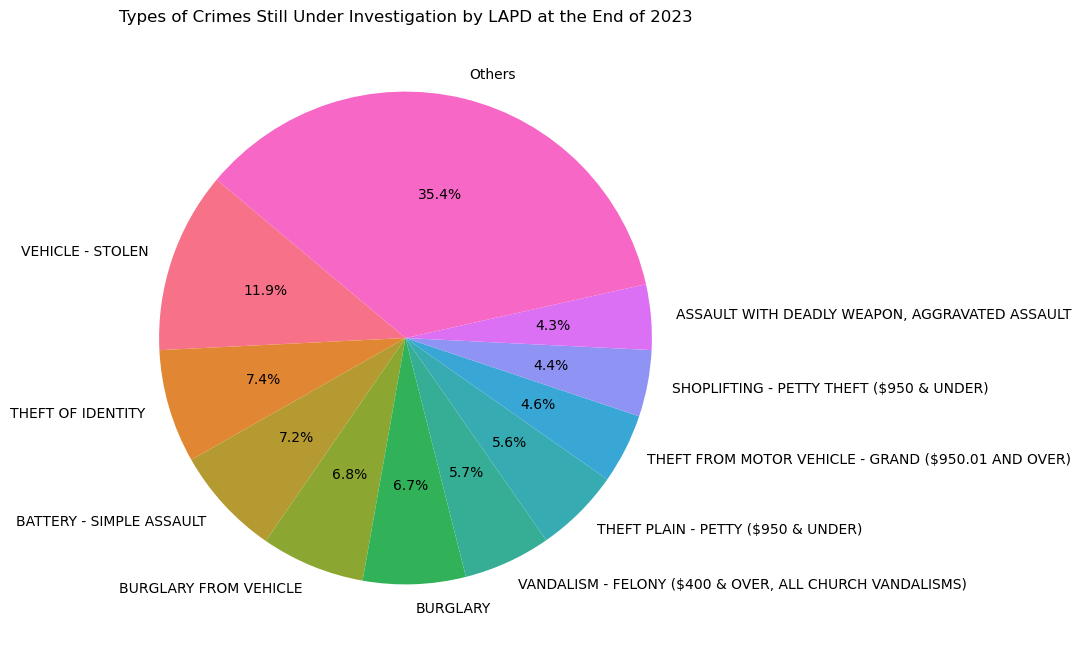

In [55]:
crime_counts = investigation_end_2023['Crm Cd Desc'].value_counts()

# Keep the top 10 crimes and group the rest into 'Others'
top_crimes = crime_counts[:10]
top_crimes['Others'] = crime_counts[10:].sum()

# Define a color palette for the pie chart with one color for each crime type plus one for 'Others'
colors = sns.color_palette('husl', n_colors=top_crimes.size)

# Plot a pie chart for the top 10 crimes with 'Others' included
plt.figure(figsize=(10, 8))
plt.pie(top_crimes, labels=top_crimes.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Types of Crimes Still Under Investigation by LAPD at the End of 2023')
plt.show()

### How long people wait before reporting the crime ?

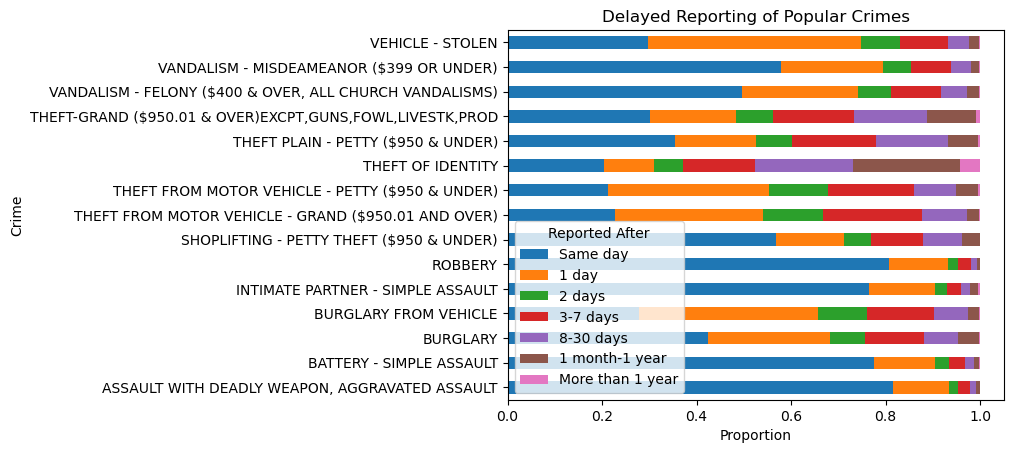

In [56]:
crime_data['delay'] = (crime_data['Date Rptd'] - crime_data['DATE OCC']).dt.days

# Create a categorical variable for delay
crime_data['delay_cat'] = pd.cut(
    x=crime_data["delay"],
    bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
    labels=["Same day", "1 day", "2 days", '3-7 days', '8-30 days', '1 month-1 year', 'More than 1 year']
)

# Define 'crime_freq_df' as the frequency of crimes
crime_freq_df = crime_data['Crm Cd Desc'].value_counts().reset_index()
crime_freq_df.columns = ['Crm Cd Desc', 'Frequency']

# Select the top crimes
top_crime = crime_freq_df.iloc[:15, 0]

# Get the normalized value counts of delay categories for the top crimes
top_crime_delay = crime_data[crime_data['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

# Plot a horizontal bar chart of the delays for the top crimes
top_crime_delay.plot.barh(stacked=True)
plt.title('Delayed Reporting of Popular Crimes')
plt.xlabel('Proportion')
plt.ylabel('Crime')
plt.legend(title="Reported After")
plt.show()

    Crimes such as 'VANDALISM - MISDEMEANOR', 'VEHICLE - STOLEN', and 'THEFT FROM MOTOR VEHICLE - GRAND' have a significant portion of reports made on the same day as the occurrence, indicated by the blue segments of the bars.

    Some crimes tend to be reported with a delay. For example, 'THEFT FROM MOTOR VEHICLE - PETTY' and 'SHOPLIFTING - PETTY THEFT' show substantial reporting within 3-7 days after the crime occurred, as indicated by the green segments.

    There are instances where crimes are reported much later. The 'More than 1 year' category, shown in pink, is relatively small across all crime types, suggesting it's less common for crimes to be reported after such an extended period.

<h1 style="color:blue">Summary </h1>

    The city is experiencing a high and rising crime rate.
    
    The top three reported offenses are vehicle theft, assault, and identity theft, with identity theft showing an alarming increase.
    
    Crimes are prevalent in various settings, with certain areas like Central and 77th Street reporting higher incidences.
    
    The risk of falling victim to a crime is distributed evenly across genders, predominantly affecting individuals between 20 to 40 years old.
    
    Certain races may face a higher risk of crime in specific neighborhoods.